In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.cross_validation import KFold

In [29]:
iris = load_iris()

mask = np.random.randn(iris.data.shape[0]) < 0.8 # 20% for test
train_x, train_y = iris.data[mask], iris.target[mask]
test_x, test_y = iris.data[~mask], iris.target[~mask]

print train_x.shape, test_x.shape

(125, 4) (25, 4)


Text(0,0.5,u'error')

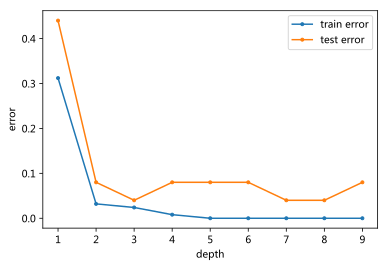

In [30]:
train_err = []
test_err = []
depths = range(1, 10)
for n in depths:
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(train_x, train_y)
    train_err.append(1 - clf.score(train_x, train_y))
    test_err.append(1 - clf.score(test_x, test_y))

plt.plot(depths, train_err, '.-')
plt.plot(depths, test_err, '.-')

plt.legend(['train error', 'test error'])
plt.xlabel('depth')
plt.ylabel('error')

In [31]:
train_err

[0.31200000000000006,
 0.032000000000000028,
 0.024000000000000021,
 0.0080000000000000071,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
"""实现K-Fold算法
可以利用sklearn的 sklearn.model_selection.KFold 实现集合划分，然后依次执行fit训练模型，
和 score 评估在评估集上的效果，将k次的效果平均得到在该组超参数下的平均效果。最后从多组超参数中
选择出最佳的超参数重新训练模型，在测试集上评估结果。
"""
best_err = 1
best_params = {'depth':0, 'min_samples_leaf': 1, 'criterion': 'entropy'}
k = 5
clf = DecisionTreeClassifier()

### YOUR CODE, 定义 kfold 对象

### END YOUR CODE

for depth in range(1,10):
    for min_samples_leaf in [1,3,10,30]:
        for criterion in ['entropy', 'gini']:            
            ### YOUR CODE，实现K-Fold算法
            
            ### END YOUR CODE
            
print('Best error: %.4f, depth=%d, min_samples_leaf=%d, criterion=%s'.format(best_err, best_params['depth'], best_params['min_samples_leaf'], best_params['criterion']))

### YOUR CODE, 在上述最佳超参数下重新在训练集上训练模型，并在测试集上评估效果

### END YOUR CODE